## Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set style
pd.set_option('display.max_columns', 60)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load data
path = r"C:\Users\ACER\Downloads\Instagram Data\instagram_users_lifestyle.csv"
df = pd.read_csv(path)
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Dataset loaded successfully!
Shape: 1,547,896 rows × 58 columns


,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,exercise_hours_per_week,sleep_hours_per_night,diet_quality,smoking,alcohol_frequency,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,hobbies_count,social_events_per_month,books_read_per_year,volunteer_hours_per_month,travel_frequency_per_year,daily_active_minutes_instagram,sessions_per_day,posts_created_per_week,reels_watched_per_day,stories_viewed_per_day,likes_given_per_day,comments_written_per_day,dms_sent_per_week,dms_received_per_week,ads_viewed_per_day,ads_clicked_per_day,time_on_feed_per_day,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,uses_premium_features,notification_response_rate,account_creation_year,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,No,7.2,7.7,Good,No,Rarely,3,8,20.8,148,86,8107,49.9,3,4,7,4.3,0,5.0,1,3,42,28,28,5,12,12,4,1,2,1,1,2,374,647,No,0.34,2015,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,No,10.9,8.6,Very poor,No,Rarely,1,1,23.5,133,84,8059,15.6,0,5,10,4.7,2,74.0,5,3,78,54,68,15,18,10,11,1,31,19,16,19,2585,3511,No,0.56,2018,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,No,5.0,6.7,Good,No,Rarely,4,10,28.6,135,88,7872,31.8,4,5,14,1.5,2,5.0,1,7,29,26,25,6,12,13,4,0,3,1,1,1,3414,6761,No,0.73,2011,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,No,10.6,6.5,Poor,Yes,Never,18,1,22.5,105,73,7801,43.4,2,3,13,3.3,4,233.0,9,5,241,109,132,36,31,32,33,3,108,64,52,64,617,1193,No,0.73,2019,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,No,7.7,6.8,Average,No,Never,19,1,28.1,146,90,8005,50.2,2,2,12,4.5,3,184.0,14,5,146,113,103,36,29,37,20,5,78,55,22,55,1157,1072,Yes,0.65,2017,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


## *Initial Data Exploration*

In [4]:
# to check column name and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

In [5]:
# Remove unnecessary columns, we do not need them for further analysis
df = df.drop(columns = ['user_id', 'last_login_date', 'account_creation_year', 'app_name'])

In [6]:
# statistical summary for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1547896.0,38.985440,15.294528,13.00,26.00,39.0,52.00,65.00
exercise_hours_per_week,1547896.0,7.143480,3.994556,0.00,4.00,6.6,9.70,24.10
sleep_hours_per_night,1547896.0,6.999384,1.097098,3.00,6.30,7.0,7.70,10.00
perceived_stress_score,1547896.0,19.987738,11.832578,0.00,10.00,20.0,30.00,40.00
self_reported_happiness,1547896.0,5.499804,2.871232,1.00,3.00,5.0,8.00,10.00
body_mass_index,1547896.0,25.000837,3.976188,15.00,22.30,25.0,27.70,45.00
blood_pressure_systolic,1547896.0,124.491714,20.206989,90.00,107.00,124.0,142.00,159.00
blood_pressure_diastolic,1547896.0,79.500074,11.548740,60.00,70.00,79.0,90.00,99.00
daily_steps_count,1547896.0,8000.104562,89.397615,7566.00,7940.00,8000.0,8060.00,8473.00
weekly_work_hours,1547896.0,36.222014,15.080632,0.00,30.50,38.7,46.00,80.00


# Data Cleaning

## *Data Missing Values*

In [7]:
# Missing values count and percentage
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) == 0:
    print("No missing values found!")
else:
    print("Missing Values:")
    print(missing_df)

No missing values found!


### Check and Remove Duplicates

In [8]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates:,}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed! New shape: {df.shape}")
else:
    print("No duplicates found!")

Duplicate rows: 0
No duplicates found!


In [9]:
df.dtypes.value_counts()

int64      27
object     18
float64     9
Name: count, dtype: int64

## Create Column Categories for Easy Reference

*we are dealing with 58 columns, it is good way to practice categories columns for further analysis* 

In [10]:
#Auto-detect column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("COLUMN SEGMENTATION")
print(f"Numeric Columns: {len(numeric_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")


COLUMN SEGMENTATION
Numeric Columns: 36
Categorical Columns: 18


In [11]:
# Statistical summary for numerical columns
print("\nStatistical Summary - Numerical Columns:")
df[numeric_cols].describe().T.round(2)


Statistical Summary - Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
age,1547896.0,38.99,15.29,13.00,26.00,39.0,52.00,65.00
exercise_hours_per_week,1547896.0,7.14,3.99,0.00,4.00,6.6,9.70,24.10
sleep_hours_per_night,1547896.0,7.00,1.10,3.00,6.30,7.0,7.70,10.00
perceived_stress_score,1547896.0,19.99,11.83,0.00,10.00,20.0,30.00,40.00
self_reported_happiness,1547896.0,5.50,2.87,1.00,3.00,5.0,8.00,10.00
body_mass_index,1547896.0,25.00,3.98,15.00,22.30,25.0,27.70,45.00
blood_pressure_systolic,1547896.0,124.49,20.21,90.00,107.00,124.0,142.00,159.00
blood_pressure_diastolic,1547896.0,79.50,11.55,60.00,70.00,79.0,90.00,99.00
daily_steps_count,1547896.0,8000.10,89.40,7566.00,7940.00,8000.0,8060.00,8473.00
weekly_work_hours,1547896.0,36.22,15.08,0.00,30.50,38.7,46.00,80.00


In [12]:
# Categorical columns summary
print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())


Categorical Columns Summary:

gender: 4 unique values
gender
Male                 743169
Female               742847
Non-binary            46196
Prefer not to say     15684
Name: count, dtype: int64

country: 10 unique values
country
United States     386829
India             278342
Brazil            186258
Other             154572
United Kingdom    123411
Name: count, dtype: int64

urban_rural: 3 unique values
urban_rural
Urban       850754
Suburban    464605
Rural       232537
Name: count, dtype: int64

income_level: 5 unique values
income_level
Middle          465037
Lower-middle    386815
Low             309736
Upper-middle    231747
High            154561
Name: count, dtype: int64

employment_status: 7 unique values
employment_status
Full-time employed    629798
Student               308192
Freelancer            168656
Not employed          146258
Unemployed            140593
Name: count, dtype: int64

education_level: 9 unique values
education_level
Bachelor’s      541083
High s

# Exploratory Data Analysis

## *Univariate Analysis*

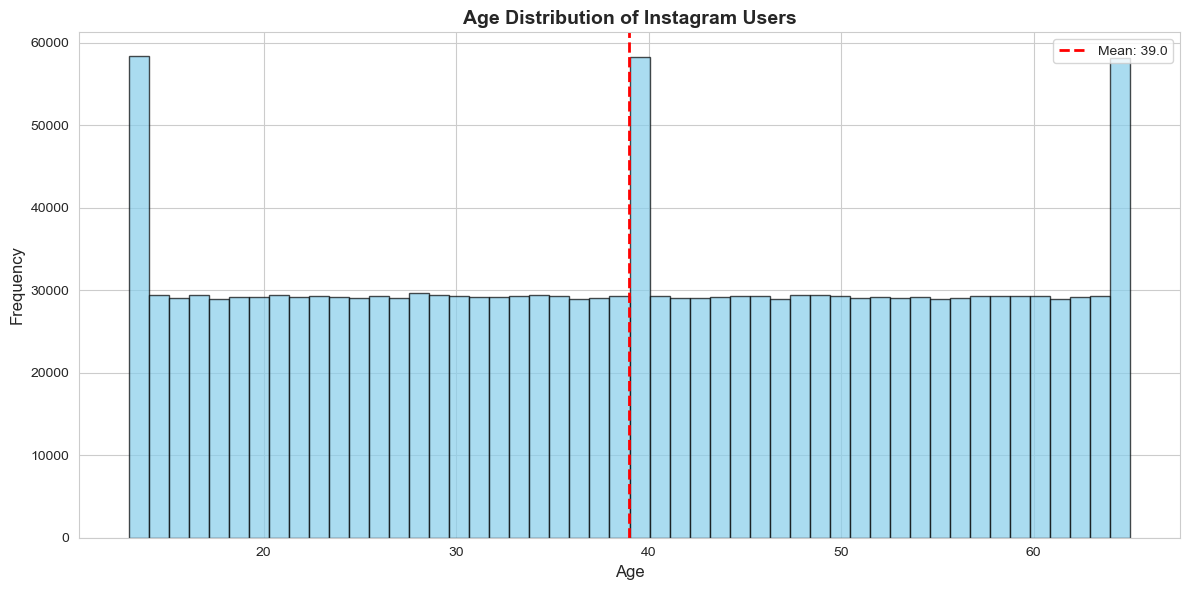

In [13]:
plt.hist(df['age'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['age'].mean():.1f}")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Instagram Users', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


## *Daily Active Minutes Distribution*

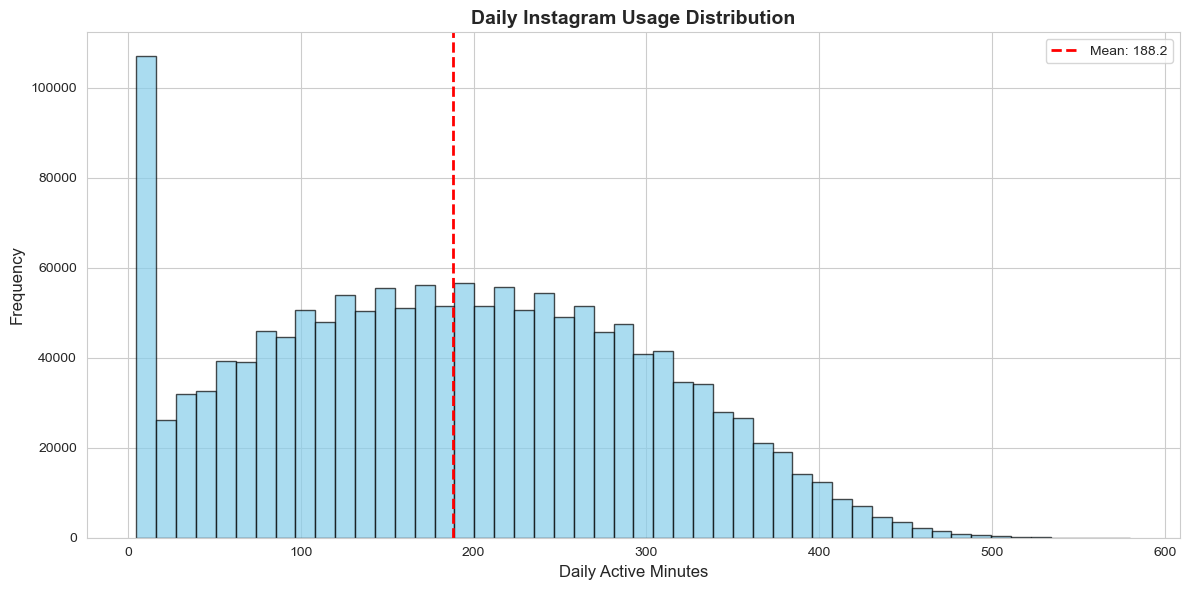

In [14]:
plt.hist(df['daily_active_minutes_instagram'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['daily_active_minutes_instagram'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f"Mean: {df['daily_active_minutes_instagram'].mean():.1f}")
plt.xlabel('Daily Active Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Daily Instagram Usage Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


## *Sessions Per Day Distribution*

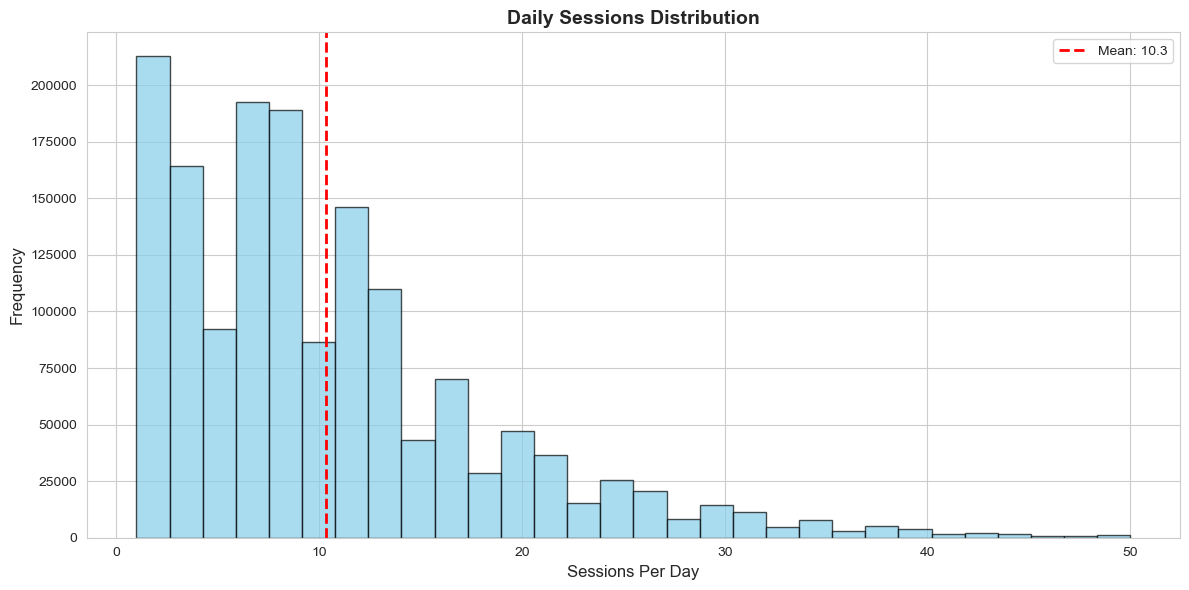

In [15]:
plt.hist(df['sessions_per_day'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['sessions_per_day'].mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean: {df['sessions_per_day'].mean():.1f}")
plt.xlabel('Sessions Per Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Daily Sessions Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


## *Reels Watched Per Day Distribution*

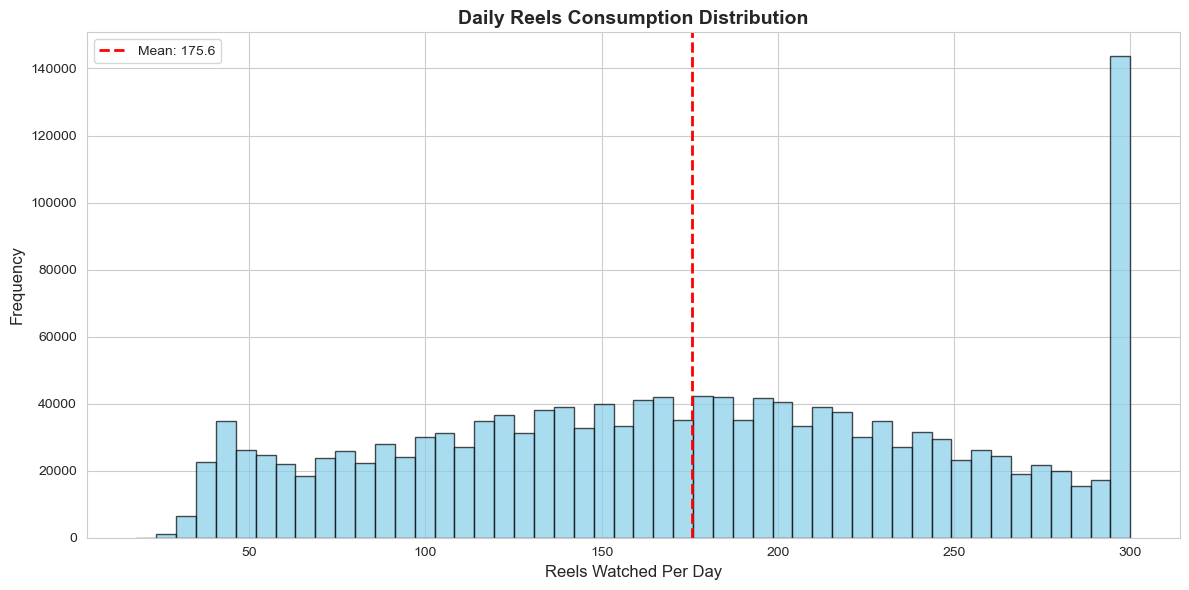

In [16]:
plt.hist(df['reels_watched_per_day'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['reels_watched_per_day'].mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean: {df['reels_watched_per_day'].mean():.1f}")
plt.xlabel('Reels Watched Per Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Daily Reels Consumption Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


## *Sleep Hours Distribution*

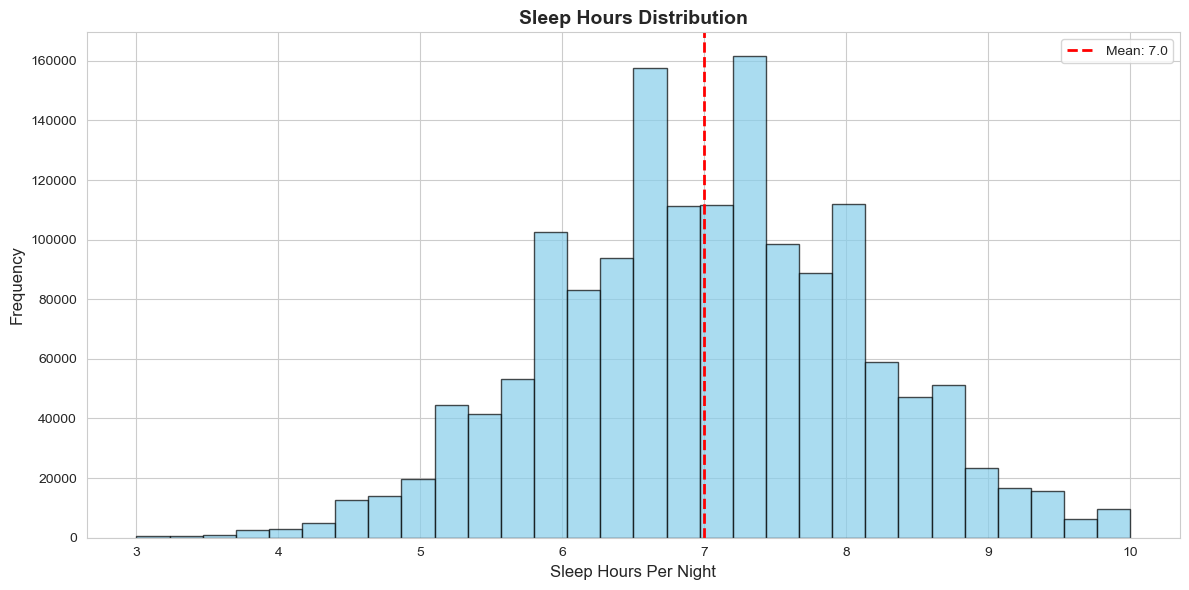

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(df['sleep_hours_per_night'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df['sleep_hours_per_night'].mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean: {df['sleep_hours_per_night'].mean():.1f}")
plt.xlabel('Sleep Hours Per Night', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sleep Hours Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

## *Gender Distribution*

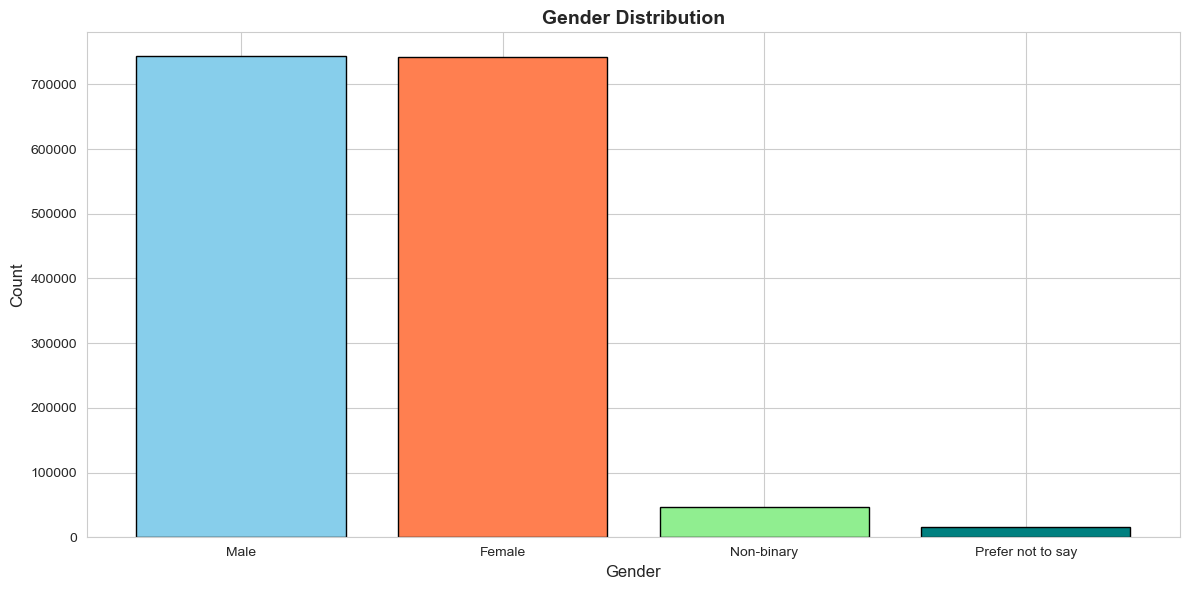

In [18]:
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, edgecolor='black', color=['skyblue', 'coral', 'lightgreen', 'teal'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## *Urban vs Rural Distribution*

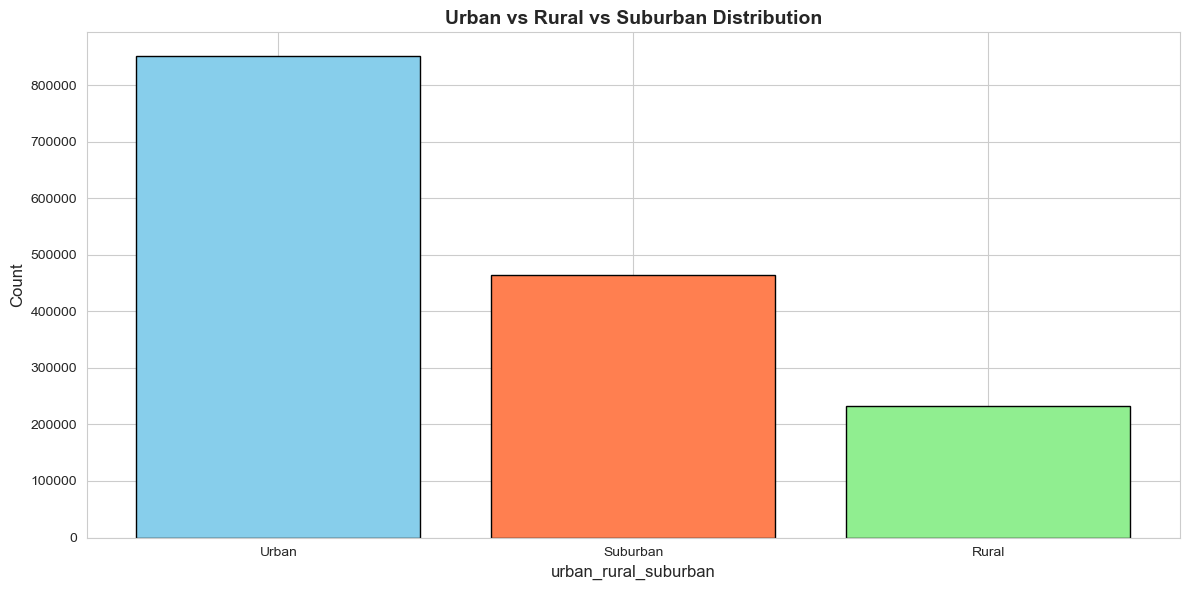

In [19]:
urban_counts = df['urban_rural'].value_counts()
plt.bar(urban_counts.index, urban_counts.values, edgecolor='black', color=['skyblue', 'coral', 'lightgreen'])
plt.xlabel('urban_rural_suburban', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Urban vs Rural vs Suburban Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## *Income Level Distribution*

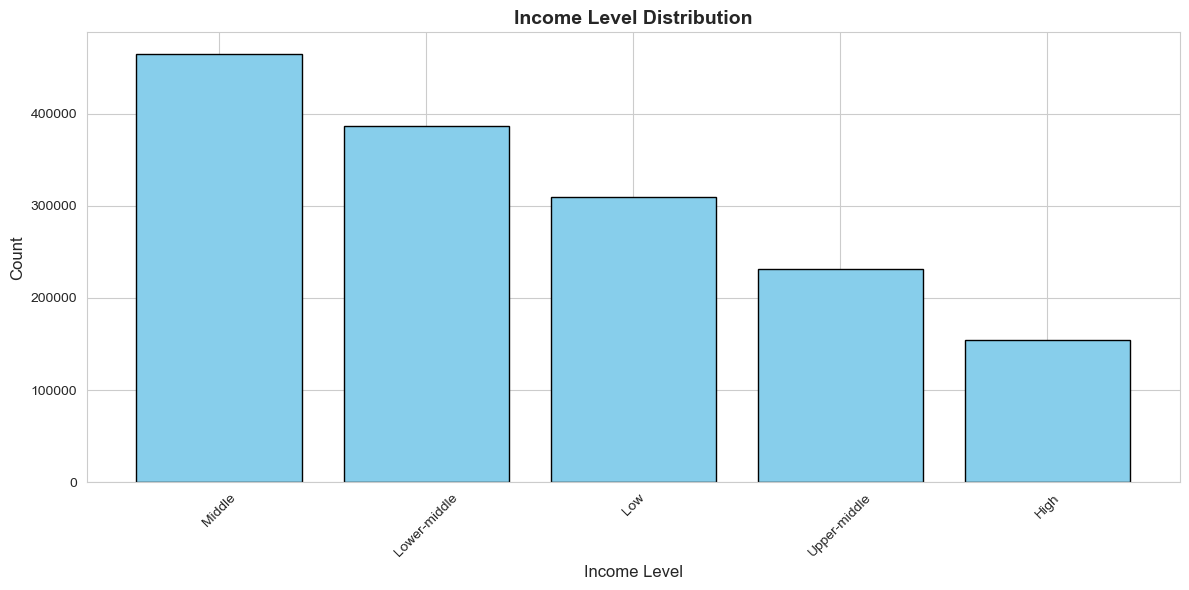

In [20]:
income_counts = df['income_level'].value_counts()
plt.bar(income_counts.index, income_counts.values, edgecolor='black', color='skyblue')
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Income Level Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Employment Status Distribution*

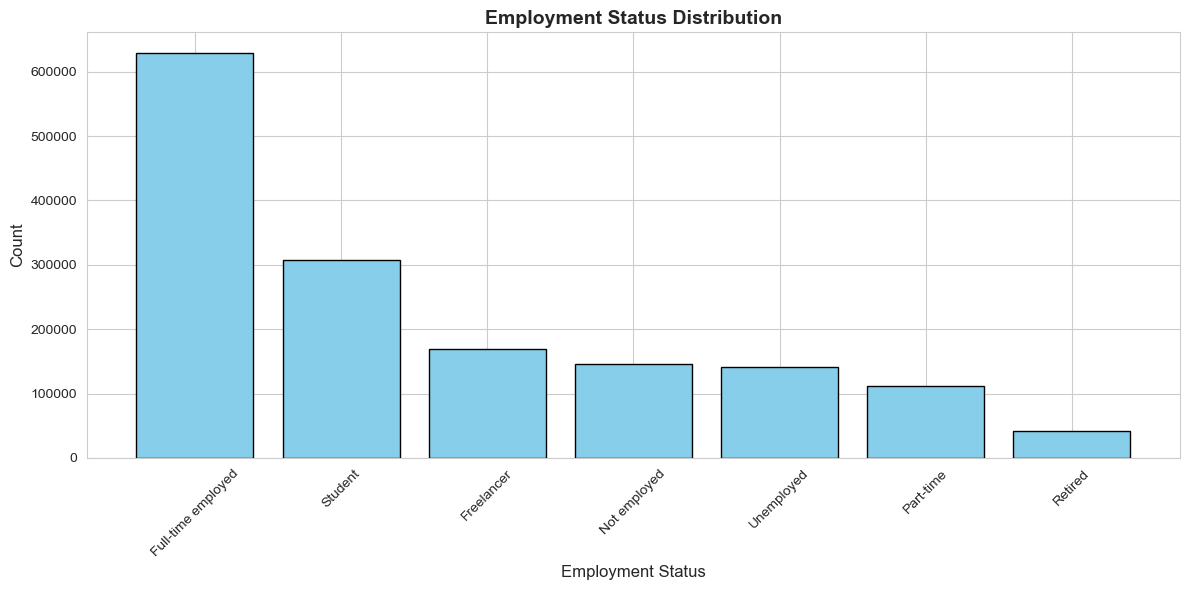

In [21]:
employment_counts = df['employment_status'].value_counts()
plt.bar(employment_counts.index, employment_counts.values, edgecolor='black', color='skyblue')
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Employment Status Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Bivariate Anlysis

## *Stress vs Daily Active Minutes*

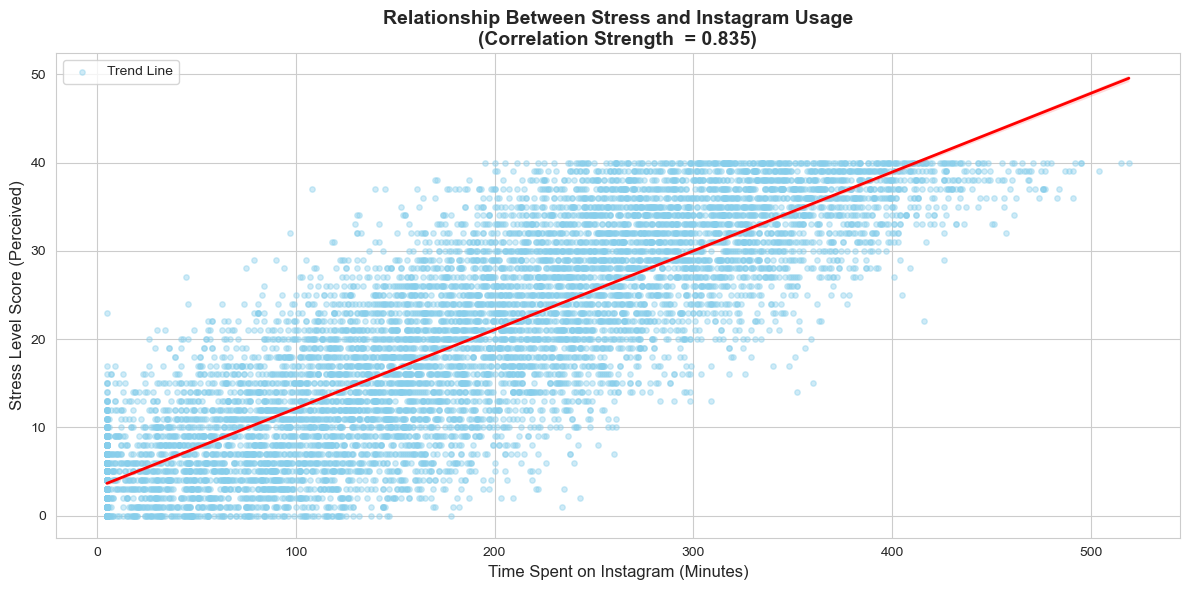

In [22]:
df_sample = df.sample(10000)

df_corr = df['daily_active_minutes_instagram'].corr(df['perceived_stress_score'])

sns.regplot(data=df_sample, x='daily_active_minutes_instagram', y='perceived_stress_score',
            scatter_kws={'alpha': 0.4, 's': 15, 'color': 'skyblue'},line_kws={'color': 'red', 'linewidth': 2},label='Trend Line')

plt.title(f'Relationship Between Stress and Instagram Usage\n(Correlation Strength  = {df_corr:.3f})', fontsize=14, fontweight='bold')
plt.xlabel('Time Spent on Instagram (Minutes)', fontsize=12)
plt.ylabel('Stress Level Score (Perceived)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


## *Screen Time vs Happiness*

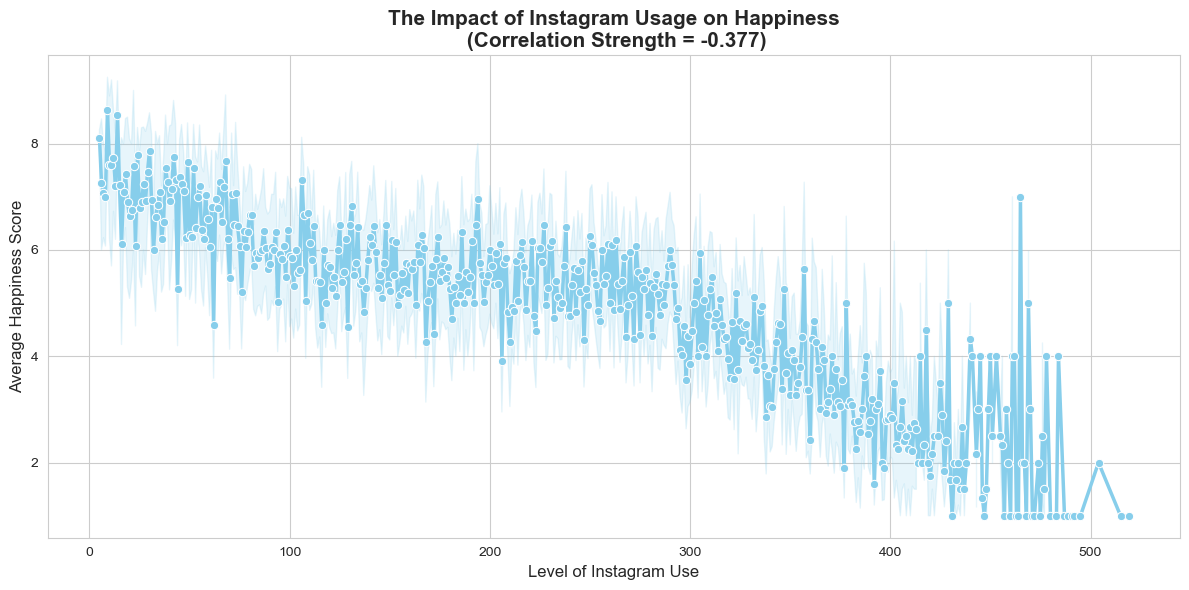

In [23]:

df_corr = df_sample['daily_active_minutes_instagram'].corr(df_sample['self_reported_happiness'])

# Lineplot
sns.lineplot(data=df_sample, x='daily_active_minutes_instagram', y='self_reported_happiness',  marker='o', color='skyblue', linewidth=2.5)

plt.title(f"The Impact of Instagram Usage on Happiness\n (Correlation Strength = {df_corr:.3f})", 
          fontsize=15, fontweight='bold')

plt.xlabel('Level of Instagram Use', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## *Reels vs Stress*

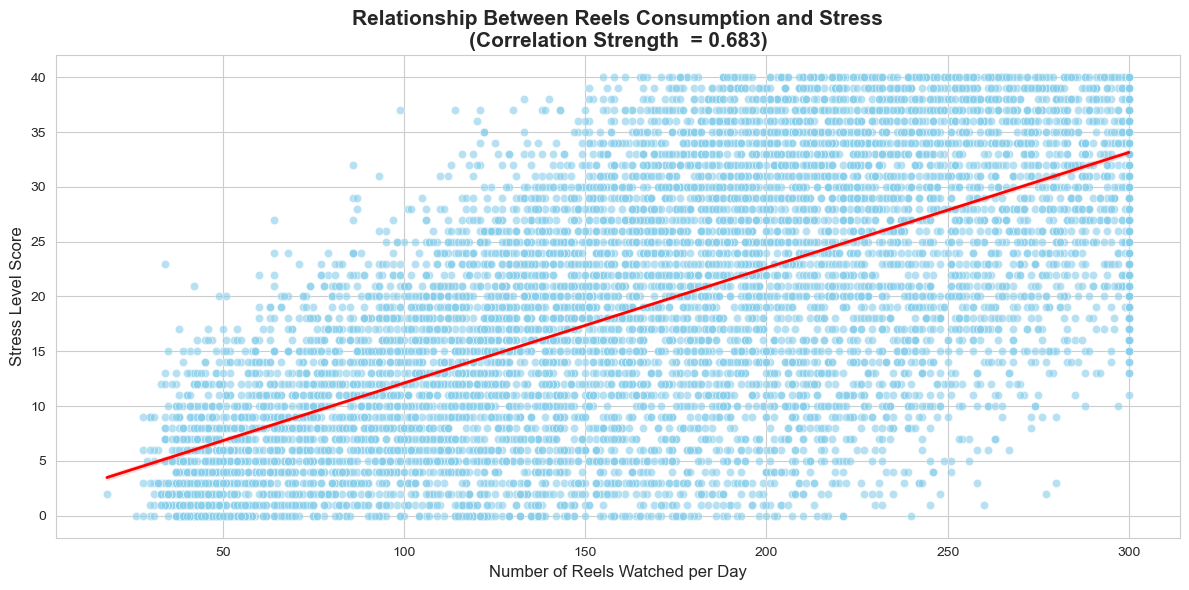

In [24]:
df_corr = df_sample['reels_watched_per_day'].corr(df_sample['perceived_stress_score'])

sns.scatterplot(data=df_sample, x='reels_watched_per_day', y='perceived_stress_score', alpha=0.6, color='skyblue')

sns.regplot(data=df_sample, x='reels_watched_per_day', y='perceived_stress_score', scatter=False, color='red', line_kws={'linewidth':2, 'linestyle':'-'})

plt.title(f"Relationship Between Reels Consumption and Stress\n(Correlation Strength  = {df_corr:.3f})", fontsize=15, fontweight='bold')
plt.xlabel("Number of Reels Watched per Day", fontsize=12)
plt.ylabel("Stress Level Score", fontsize=12)
plt.tight_layout()
plt.show()



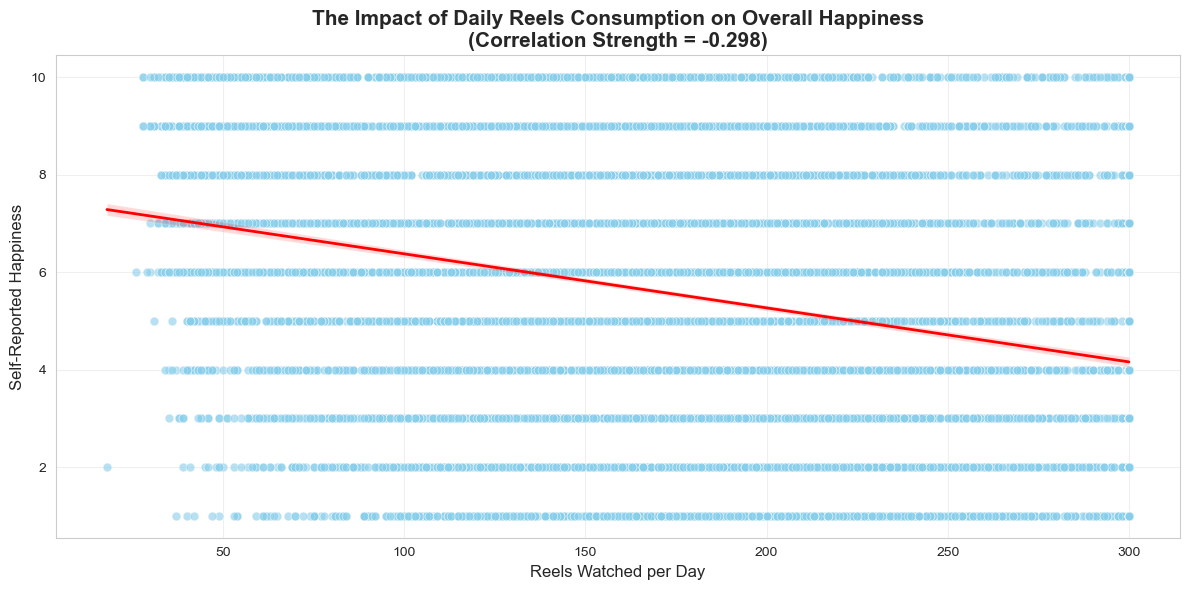

In [25]:
corr = df_sample['reels_watched_per_day'].corr(df_sample['self_reported_happiness'])

# Scatter points
sns.scatterplot(data=df_sample, x='reels_watched_per_day', y='self_reported_happiness', alpha=0.6, s=40, color='skyblue')

# Trend line 
sns.regplot(data=df_sample, x='reels_watched_per_day', y='self_reported_happiness', scatter=False, color='red', line_kws={'linewidth':2})

plt.title(f'The Impact of Daily Reels Consumption on Overall Happiness\n(Correlation Strength = {corr:.3f})', fontsize=15, fontweight='bold')
plt.xlabel('Reels Watched per Day', fontsize=12)
plt.ylabel('Self-Reported Happiness', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()